<h1> Programming for Physics <br> Lecture 15: Optimization and Equation Solving </h1>
<a target="_blank" href="https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/lecture%2015%20optimization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In the previous lectures, we have learned how to simulate physical systems by numerically solving ordinary differential equations (ODEs) using the Euler method.    
  
   


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

---

## The physics about a beach lifeguard ...
<div style='display:flex'>

<img src='https://m.media-amazon.com/images/I/618WNFVLSQL.jpg' height=500 style='height:500px; margin:20px'>


"Since I started my quantum field theory text with a story, possibly apocryphal, about
Feynman in a quantum mechanics class, I feel compelled to start this text also by telling a
story, possibly true, about Feynman. The movie opens on a gorgeous southern California
beach. We zoom in on a lifeguard, noticeably scrawnier than the other lifeguards. But
on the other hand, we soon discover that he is considerably smarter. Egads, it is Dick
Feynman, in the days before Baywatch! Perched on his high chair, he has been watching
an attractively curvaceous swimmer with great interest, plotting how he could win the girl’s
affection, all the while solving a field theory problem in his head. Suddenly, he notices that
the girl is splashing about frantically. She is going under! Must be a cramp! An action hero
is as an action hero does: Feynman jumps down from his lookout and goes into action.∗
The other lifeguards are already proceeding in a straight line (starting from point F, the
lifeguard station, in figure 1, going along the dotted line) toward the girl (at point G). That
would be the path of least distance. But no, Feynman has already calculated the path that
would allow him to reach the girl in the least amount of time. Time counts more than
space here: least time trumps least distance. Our hero (like other humans) can run much
faster, even on a soft sandy beach, than he can swim. So the rescuer should spend more
time running before plunging into the sea. A simple high school level calculation shows Feynman the best path to take. Our hero beats the
other guys and gets to the eternally grateful girl first!"

</div>

<img src='https://pbs.twimg.com/media/GD68Q87WMAAuLP_?format=png'>



## and a dog or light

<div style='display:flex'>

![image](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/dog_ball.png?raw=true)

![image](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/light_refraction.png?raw=true)

</div>

---

## How to find the best path


- The speed of running is $v_{run}$

- The speed of swimming is $v_{swim}$

How to calculate the optimal $x$?

## Method

<div style='display:flex'>

![image](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/best_x.png?raw=true)


<div>

step1. Make a function $t(x)$ and its derivative $t'(x)$

step2. Find the best x that __minimize__ $t(x)$

- directly minimize $t(x)$
    - using package scipy.optimize.minimize
    - gradient descend

        
- get the derivative t'(x) and solve t'(x)==0
    - using package sympy.solve
    - using package function scipy.optimize.root
    - Newton iteration
</div>


</div>


$$
r_{run} =\sqrt{a^2 + x^2}
$$

$$
r_{swim} =\sqrt{b^2 + (l-x)^2}
$$

$$
t = r_{run}/v_{run} + r_{swim}/v_{swim}
$$ 

$$
t(x) = \frac{1}{v_{run}}\sqrt{a^2 + x^2} + \frac{1}{v_{swim}}\sqrt{b^2 + (l-x)^2}
$$

$$
t'(x) = \frac{x}{v_{run}r_{run}} + \frac{x-l}{v_{swim}r_{swim}}
$$


## Define the functions `total_time` and `d_total_time`

In [2]:
def total_time(x):  ##t(x)
    r_run = (a**2 + x**2)**0.5
    r_swim = (b**2 + (l-x)**2)**0.5
    t_run = r_run/v_run
    t_swim = r_swim/v_swim
    t = t_run + t_swim
    return t

def d_total_time(x): ##t'(x)
    r_run = (a**2 + x**2)**0.5
    r_swim = (b**2 + (l-x)**2)**0.5
    dt = 1/v_run*x/r_run + 1/v_swim*(x-l)/r_swim
    return dt

Set the parameters

In [6]:
l = 100 #m the life guard is l meters away from the person in the x direction
v_run = 6 #m/s
v_swim = 4  #m/s
a = 10 #m ; the life guard is a meters away from the ocean
b = 10 #m; the drowning person is 10 meters in the ocean

visualize the function

Text(0, 0.5, 'total time')

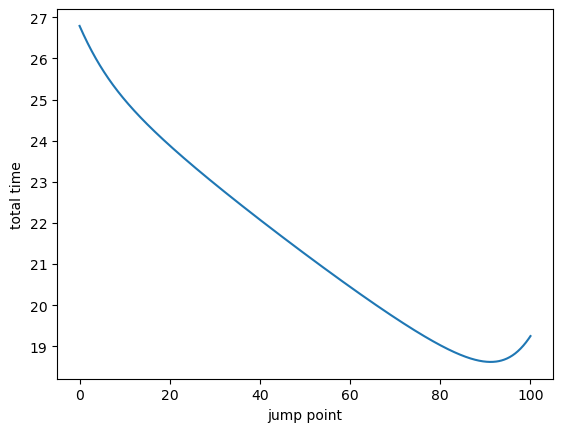

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,l,1000)#an array of 1000 points between 0 and l
plt.plot(x,total_time(x))
plt.xlabel('jump point')
plt.ylabel('total time')

## minimize the total time

### use package

In [8]:
import scipy.optimize
result = scipy.optimize.minimize(total_time,20)
result.x

array([91.15106803])

####  Example

Find the minimal point of the function 

$$
f(x) = x^4 + x^2 - x
$$

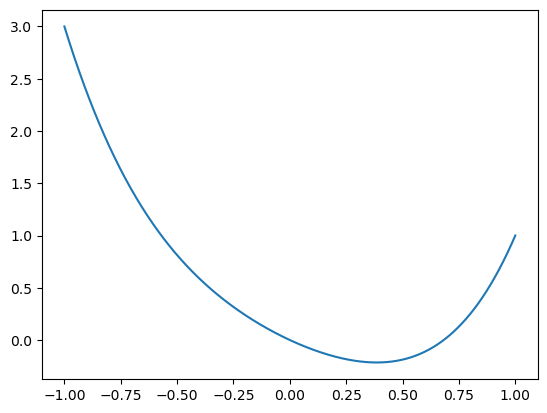

In [8]:
x = np.linspace(-1,1,1000)
plt.plot(x, x**4+x**2-x)

In [9]:
result=scipy.optimize.minimize(lambda x:x**4+x**2-x,6)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.21480474685283232
        x: [ 3.855e-01]
      nit: 13
      jac: [ 5.011e-07]
 hess_inv: [[ 2.637e-01]]
     nfev: 28
     njev: 14

Text(0, 0.5, 'f(x)')

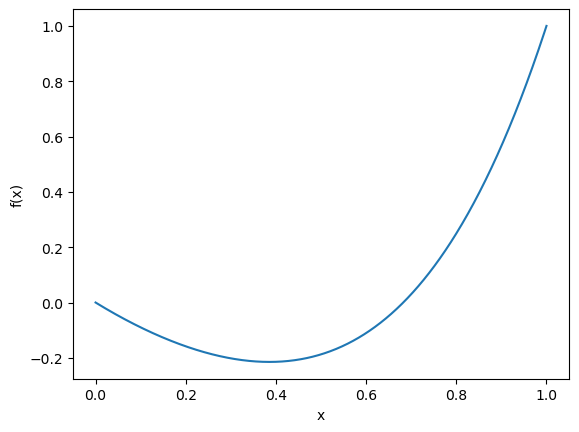

In [15]:
#visualize the function
x = np.linspace(0,1,1000)#an array of 1000 points between 0 and l
plt.plot(x,x**4 + x**2 - x)
plt.xlabel('x')
plt.ylabel('f(x)')

### Gradient Descend

Walking in a foggy hill

<div style='display:flex; align-items:center'>

<img src='https://i0.wp.com/analyticsarora.com/wp-content/uploads/2022/02/gradient-descent-settles-to-local-optimum-1.png?w=800&ssl=1' height=400 style='height:400px; margin:20px'>


<div>

$
x_{n+1} = x_{n} - \gamma f'(x_n)
$


The parameter $\gamma$ here is called the __learning rate__ in machine learning language.

</div>

</div>

1. Picking an starting point $x_0$:
2. starting the iteration (go down the hill)

$$
x_{n+1} = x_{n} - \gamma f'(x_n)
$$

3. stopping the iteration when $x_{n+1} \approx x_{n}$. In practice, we can stop when $|x_{n+1}- x_{n}| < \epsilon$ for a small number $\epsilon$.

In [29]:
def gradient_descend(df, x0, gamma, num_step=300): 
    #df is used as a function
    x_list=[x0]
    x = x0
    for i in range(num_step):
        x_new = x - gamma*df(x)
        x_list.append(x_new)
        if abs(x_new -x)<1e-5:
            return x_list
        x = x_new
    return x_list

91.15098359219424


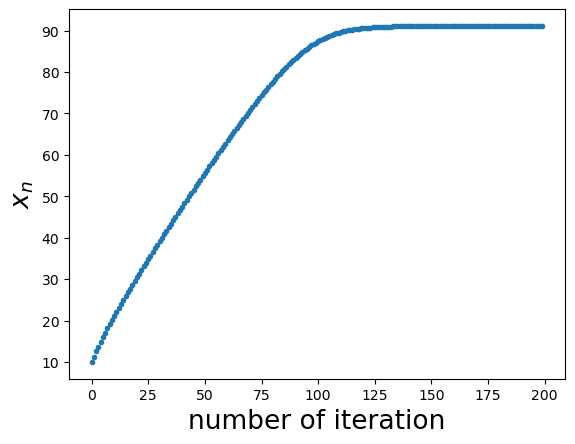

In [30]:
x_list = gradient_descend(df = d_total_time, x0=10, gamma=10)
plt.plot(x_list,'.')
plt.xlabel('number of iteration',fontsize=19)
plt.ylabel('$x_n$',fontsize=19)
print(x_list[-1])

#### Tuning the learning rate $\gamma$

<img src='https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/gradient-descent-learning-rate.png'>

- Large learning rate can get the the minimum faster but it might overshoot and miss the minimum.
- Small learning rate leads to a more stable minimization but requires more iteration steps.

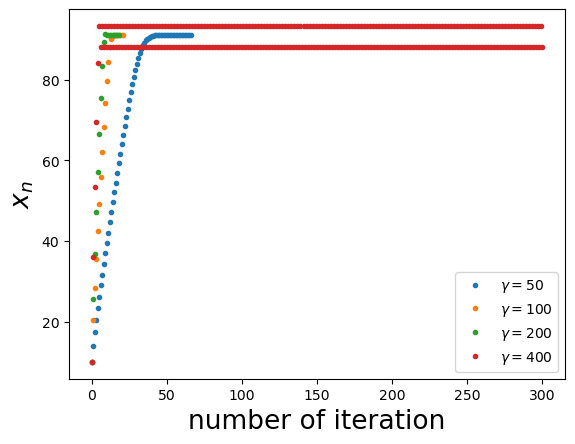

In [17]:
x_list = gradient_descend(df = d_total_time, x0=10, gamma=30)
plt.plot(x_list,'.', label=r'$\gamma=50$')

x_list = gradient_descend(df = d_total_time, x0=10, gamma=80)
plt.plot(x_list,'.', label=r'$\gamma=100$')

x_list = gradient_descend(df = d_total_time, x0=10, gamma=120)
plt.plot(x_list,'.', label=r'$\gamma=200$')

x_list = gradient_descend(df = d_total_time, x0=10, gamma=200)
plt.plot(x_list,'.', label=r'$\gamma=400$')

plt.xlabel('number of iteration',fontsize=19)
plt.ylabel('$x_n$',fontsize=19)

plt.legend()

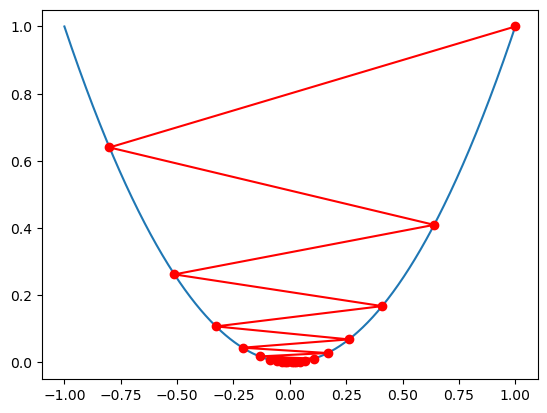

In [107]:
f = lambda x: x**2
df = lambda x: 2*x

x_list = gradient_descend(df = df, x0=1, gamma=0.9, num_step=20)

x = np.linspace(-1,1,1000)#an array of 1000 points between 0 and l
plt.plot(x, f(x))
plt.plot(x_list, f(np.array(x_list)),'r',marker='o')

---

## Solve for equations

$t'(x)==0$

1. Using packages
2. Newton iteration

### Using Package
1. scipy.optimize.root (numerical)
2. sympy.solve (symbolic)

#### scipy

Scipy providers a numerical solver for finding roots of equations. It requires an initial guess of the root. 


In [18]:
import scipy
result = scipy.optimize.root(d_total_time,10)
result

 message: The solution converged.
 success: True
  status: 1
     fun: [-7.483e-14]
       x: [ 9.115e+01]
  method: hybr
    nfev: 13
    fjac: [[-1.000e+00]]
       r: [-1.052e-02]
     qtf: [-3.596e-09]

In [113]:
result = scipy.optimize.root(lambda x:x**3-1, 0.3)
result

 message: The solution converged.
 success: True
  status: 1
     fun: [ 2.864e-14]
       x: [ 1.000e+00]
  method: hybr
    nfev: 14
    fjac: [[-1.000e+00]]
       r: [-3.000e+00]
     qtf: [ 9.731e-09]

#### sympy
This is a symbolic calculation package. It can give symbolic forms of the roots of equations when possible.

In [20]:
import sympy #symbolic calculation

In [110]:
x = sympy.symbols('x') #create a symbolic variable
x**3-1

x**3 - 1

In [115]:
sympy.diff(x**3-1)

3*x**2

In [23]:
sympy.solve(x**3 - 1, x) #it tries to give the symbolic form of the root

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [114]:
sympy.solve(sympy.diff(total_time(x)))

[91.1510683889362]

### Newton Method

Newton method is an iterative method to find the root of an equation $y(x) =0$ from an initial guess $x_0$. 

Consider the simple case where $y(x)$ describes a straight line that passes through the point $(x_0, y_0)$ with a slope $k$. The equation of the line is
$$
y(x) = k(x-x_0) +y_0
$$


<div style='display:flex;align-items:center'>

![image.png](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/newton_line.png?raw=true)

<div>

We want to find the root $x_1$ such that $y(x_1) =0$. Geometrically, this is the point where the line crosses the x-axis. Solving for $x_1$, we have

line: $y(x) = k(x-x_0) +y_0$

solve: $0 = k(x_1 -x_0) + y_0$

$x_1 = x_0 - \frac{y_0}{k} $ 

Here, $k$ is the slope of the line at point $x_0$, which is the derivative of $y(x)$ at $x_0$, or $y'(x_0)$. Also, $y_0 = y(x_0)$. Therefore, we have

$x_1 = x_0 -\frac{y(x_0)}{y'(x_0)}$

</div>
</div>



For a linear line, the solution is found in one step

- what about general function?


<img src='https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif'>


<div style='display:flex;align-items:center'>

<img src='https://tutorial.math.lamar.edu/classes/calci/NewtonsMethod_Files/image001.png'>

$$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

</div>


To find a root of function $f(x)$ using Newton iteration:

1. picking an initial point $x_0$

2. starting the iteration following the rule:

\begin{equation}
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
\end{equation}

3. Stopping the iteration when $x_{n+1} \approx x_{n}$


In [32]:
def Newton_method(f,df, x0, num_step=100): 
    x_list=[x0]
    x= x0

    for i in range(num_step):
        x_new = x - f(x)/df(x)
        x_list.append(x_new)
        if abs(x_new -x )<1e-5:
            return x_list
        x = x_new
        
    x_list.append(None) #if the loop is finished, it means that no solution is found and we append the none value to the list
    return x_list

Example: $f(x) = x^3 -1 $, $f'(x) = 3 x^2$

In [28]:
x_list = Newton_method(f = lambda x:x**3-1, df = lambda x: 3*x**2, x0 = 2)
x_list

[2,
 1.4166666666666665,
 1.1105344098423684,
 1.0106367684045563,
 1.0001115573039492,
 1.0000000124431812,
 1.0000000000000002]

---

### Newton Fractal

Again consider the function $f(z) = z^3 -1$ but in the complex plane: $z = x + iy$

It has __three__ roots

![image](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/three_root.png?raw=true)

Picking an initial point $z_0$, it will converge to one of the root. But which one? Based on the converged result, color each point on the plane.


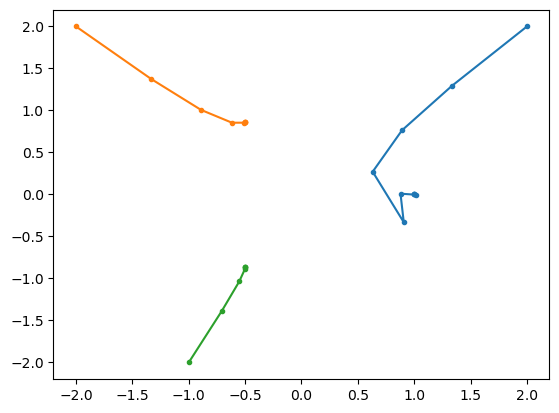

In [37]:
import numpy as np
x_list = Newton_method(f = lambda x:x**3-1, df = lambda x: 3*x**2, x0 = 2+2j)
plt.plot(np.real(x_list), np.imag(x_list),'.-') # converges to 1+0j and is colored accordingly

x_list = Newton_method(f = lambda x:x**3-1, df = lambda x: 3*x**2, x0 = -2+2j)
plt.plot(np.real(x_list), np.imag(x_list),'.-') # converges to 1+0j and is colored accordingly


x_list = Newton_method(f = lambda x:x**3-1, df = lambda x: 3*x**2, x0 = -1-2j)
plt.plot(np.real(x_list), np.imag(x_list),'.-') # converges to 1+0j and is colored accordingly



It is kind of similar to the magnetic pendulum with three magnets below the pendulum. 
[chaos in magnetic pendulum] https://www.youtube.com/watch?v=oVNr5wPHuTs


In [27]:
# Newton Fractal
x_min = -1
x_max = +1
y_min = -1
y_max = +1
#the range in the complex plane
f = lambda x:x**3-1
df = lambda x:3*x**2

dim=1000; #divide the complex plane to 200*200 small square

root =[1, -1/2-np.sqrt(3)/2*1j, -1/2 + np.sqrt(3)/2*1j] #3 roots

x = np.linspace(x_min, x_max, dim) #real part, 1000   points from x_min to x_max
y = np.linspace(y_min, y_max, dim) #imaginary part, 1000 points from y_min to y_max

result = np.zeros((dim,dim),dtype=complex)  #the dim*dim matrix to store the result

for i_x in range(dim): #going through all real parts
    for i_y in range(dim): #going through all imaginary parts
        z = x[i_x] + 1j*y[i_y] #the complex number at the point
        z
        z_list = Newton_method(f, df, z) #newton iteration
        result[i_y, i_x] = z_list[-1]
        
#         for i_root in range(4):
#             if abs(z_list[-1] - root[i_root])<1e-5:
#                 result[i_y,i_x] = i_root+1 # label the point
#                 break
        

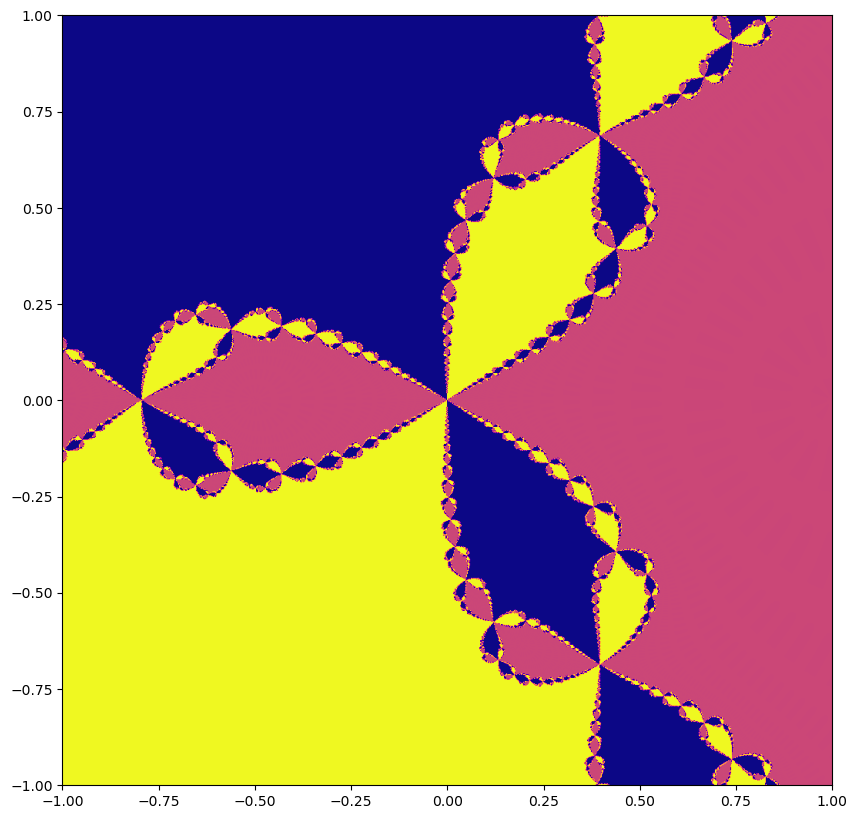

In [42]:
plt.figure(figsize = (10,10))
plt.imshow(np.angle(result), extent=[x.min(), x.max(), y.min(), y.max()], cmap='plasma')


You can watch this video for more details: [https://www.youtube.com/watch?v=TOR37v5GV5o]

---

## Summary
### Gradient descend
1. Picking an starting point $x_0$:
2. starting the iteration (go down the hill)

\begin{equation}
x_{n+1} = x_{n} - \gamma f'(x_n)
\end{equation}

3. stopping the iteration when $x_{n+1} \approx x_{n}$

### Newton Method

To find a root of function $f(x)$:

At $x=x_n$, the value of the function is $f(x_n)$ and the slope is $f'(x_n)$

1. picking an initial point $x_0$

2. starting the iteration following the rule:

\begin{equation}
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
\end{equation}

3. Stopping the iteration when $x_{n+1} \approx x_{n}$

### Motion


\begin{equation}
\begin{aligned}
a_ n &= \vec f(\vec r_n, \vec v_n, t) \\
t_{n+1} &= t_{n} + \Delta t \\
\vec v_{n+1} &= \vec v_{n} + a_n \Delta t\\
\vec r_{n+1} &= \vec r_{n} + \vec v_{n+1} \Delta t \\
\end{aligned}
\end{equation}

## Common structure:

The quantities (the state of the system) at step $n+1$ depend on step $n$ according to some simple rules.

$$
\mathcal{S}_{n+1} = \vec F(\mathcal{S}_{n+1})
$$

    

__simple rules can lead to complex pattern__



__Is there such a simple rule that leads to all the complex phenomena of our universe ?__

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*l4Lm4I87vDusPqCqs7l0yw.gif'>